In [2]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
from sklearn.ensemble import RandomForestRegressor

In [20]:
raw = pd.read_excel('../CononsythFarm/Raw_data/15minutes_Full/full_raw_data.xlsx')
raw.shape

(213423, 19)

In [21]:
raw = raw[['Date', 'PV_Production']]

In [22]:
raw.head()

,Date,PV_Production
0,2012-01-01 00:15:00,NaN
1,2012-01-01 00:30:00,NaN
2,2012-01-01 00:45:00,NaN
3,2012-01-01 01:00:00,NaN
4,2012-01-01 01:15:00,NaN


In [23]:
raw['Date'] = pd.to_datetime(raw['Date'])

raw = raw.set_index(raw['Date'])
raw = raw.sort_index()


In [24]:
raw = raw.resample('h').sum()

In [25]:
raw.head()

,PV_Production
Date,
2011-09-30 12:00:00,12280.79
2011-09-30 13:00:00,3563.88
2011-09-30 14:00:00,25597.76
2011-09-30 15:00:00,21112.74
2011-09-30 16:00:00,12492.41


In [28]:
raw[raw['PV_Production'] == raw['PV_Production'].max()]

,PV_Production
Date,
2017-05-07 12:00:00,43122.39


In [29]:
raw.reset_index(inplace=True)

In [32]:
raw.sort_values(by='PV_Production', ascending=False).head(5)

,Date,PV_Production
49104,2017-05-07 12:00:00,43122.39
32016,2015-05-26 12:00:00,42836.13
49105,2017-05-07 13:00:00,42358.28
32377,2015-06-10 13:00:00,42246.65
14088,2013-05-09 12:00:00,42059.67


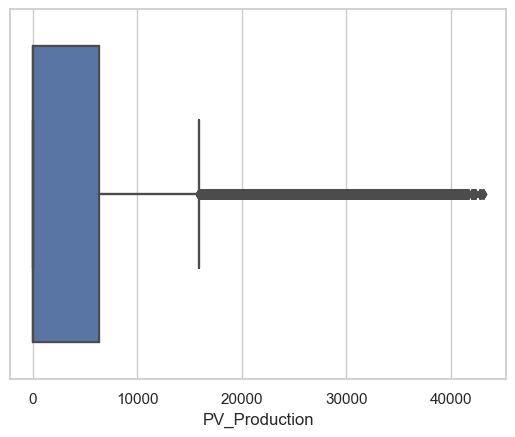

In [3]:
data = pd.read_csv('../train_clean.csv')
data.head()

,Unnamed: 0,Date,year,month,day,hour,t-3,t-2,t-1,t
0,3,2011-09-30 15:00:00,2011,9,30,15,12280.79,3563.88,25597.76,21112.74
1,4,2011-09-30 16:00:00,2011,9,30,16,3563.88,25597.76,21112.74,12492.41
2,5,2011-09-30 17:00:00,2011,9,30,17,25597.76,21112.74,12492.41,5425.20
3,6,2011-09-30 18:00:00,2011,9,30,18,21112.74,12492.41,5425.20,667.78
4,7,2011-09-30 19:00:00,2011,9,30,19,12492.41,5425.20,667.78,0.00


In [4]:
data.drop(columns=['Unnamed: 0', 'Date'], inplace=True)

In [6]:
X = data[['year', 'month', 'day', 'hour', 't-3', 't-2', 't-1']]
y = data['t']

In [9]:
model = RandomForestRegressor(n_jobs=10)
model.fit(X, y)

RandomForestRegressor(n_jobs=10)

In [11]:
var_imp = pd.DataFrame({
 'feature': ['year', 'month', 'day', 'hour', 't-3', 't-2', 't-1'], 
 'v_importance': model.feature_importances_.tolist()
 })
var_imp.sort_values(by = 'v_importance', ascending=False)

,feature,v_importance
6,t-1,0.846005
3,hour,0.065243
5,t-2,0.025719
4,t-3,0.022880
1,month,0.016757
2,day,0.015805
0,year,0.007591


In [14]:
filted.drop(columns=['t-3', 't-2', 't-1'], inplace=True)

In [18]:
filted  = filted[filted['month'] == 6].copy()
filted.drop(columns=['month'], 
            inplace=True)

filted.head()

,day,hour,t
32145,1,0,0.00
32146,1,1,0.00
32147,1,2,0.00
32148,1,3,0.00
32149,1,4,103.22


In [21]:
import plotly.express as px

fig = px.parallel_coordinates(filted,
                             color_continuous_scale=px.colors.diverging.Tealrose,
                             color_continuous_midpoint=2)
fig.show()

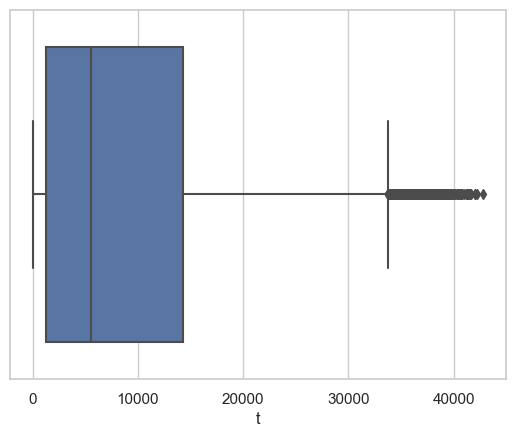

In [48]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.boxplot(x=aux["t"])
plt.show()

In [97]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [98]:
data.head()

,Date,year,month,day,hour,t-3,t-2,t-1,t
0,2011-09-30 15:00:00,2011,9,30,15,12280.79,3563.88,25597.76,21112.74
1,2011-09-30 16:00:00,2011,9,30,16,3563.88,25597.76,21112.74,12492.41
2,2011-09-30 17:00:00,2011,9,30,17,25597.76,21112.74,12492.41,5425.20
3,2011-09-30 18:00:00,2011,9,30,18,21112.74,12492.41,5425.20,667.78
4,2011-09-30 19:00:00,2011,9,30,19,12492.41,5425.20,667.78,0.00


In [99]:
data.drop(columns=['Date'], inplace=True)

In [100]:
data['t2'] = data['t'] * data['t']
data.head()

,year,month,day,hour,t-3,t-2,t-1,t,t2
0,2011,9,30,15,12280.79,3563.88,25597.76,21112.74,4.457478e+08
1,2011,9,30,16,3563.88,25597.76,21112.74,12492.41,1.560603e+08
2,2011,9,30,17,25597.76,21112.74,12492.41,5425.20,2.943280e+07
3,2011,9,30,18,21112.74,12492.41,5425.20,667.78,4.459301e+05
4,2011,9,30,19,12492.41,5425.20,667.78,0.00,0.000000e+00


In [101]:
stats.jarque_bera(data['t'])

Jarque_beraResult(statistic=52343.77160046479, pvalue=0.0)

In [102]:
stats.anderson(data['t'], dist='norm')

AndersonResult(statistic=6462.687995923778, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

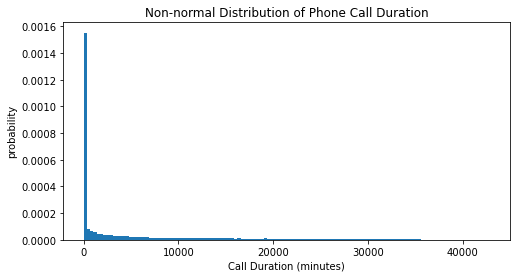

In [103]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(data['t'], bins='auto', density=True)
ax.set_xlabel('Call Duration (minutes)')
ax.set_ylabel('probability')
ax.set_title('Non-normal Distribution of Phone Call Duration')

plt.show()

In [104]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

In [105]:
data = data[data['t'] > 0.0]

In [106]:
rng = np.random.RandomState(304)

X_train, X_test = train_test_split(data['t'].values.reshape(-1, 1),
                                   test_size=.5)

bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
qt = QuantileTransformer(output_distribution='normal',
                         random_state=rng)



X_trans_bc = bc.fit(X_train).transform(X_test)
lmbda_bc = round(bc.lambdas_[0], 2)

X_trans_yj = yj.fit(X_train).transform(X_test)
lmbda_yj = round(yj.lambdas_[0], 2)
                 
X_trans_qt = qt.fit(X_train).transform(X_test)

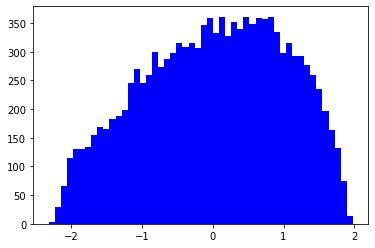

In [107]:
plt.hist(X_trans_bc, color='blue', bins=50)
plt.show()

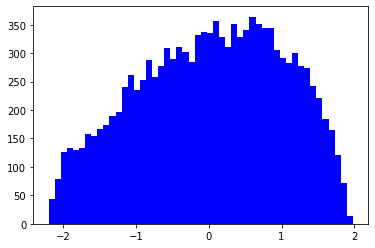

In [108]:
plt.hist(X_trans_yj, color='blue', bins=50)
plt.show()

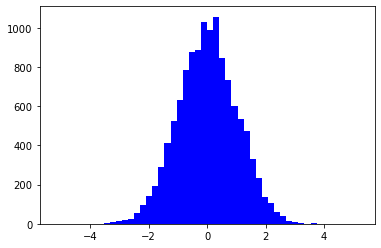

In [109]:
plt.hist(X_trans_qt, color='blue', bins=50)
plt.show()

In [31]:
def make_analysis(dataset, column, alpha=0.05, qq_plot=True, histogram=True, density=True):    
    if density:
        dataset[column].plot.kde()
        plt.show()
          
    if histogram:
        plt.hist(dataset[column], bins=50)
        plt.show()

    if qq_plot:
        qqplot(dataset[column], line='s')
        plt.show()

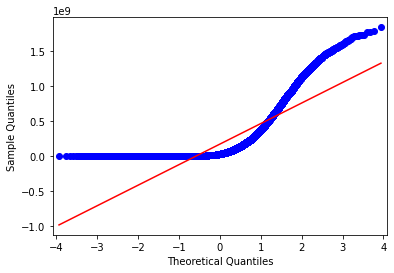

In [24]:
make_analysis(data, 't2', qq_plot=True, histogram=False, density=False)

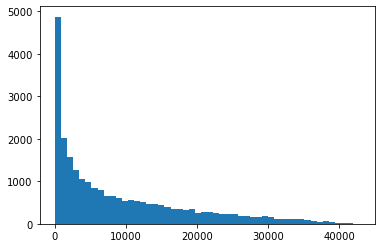

In [32]:
make_analysis(data, 't', qq_plot=False, histogram=True, density=False)

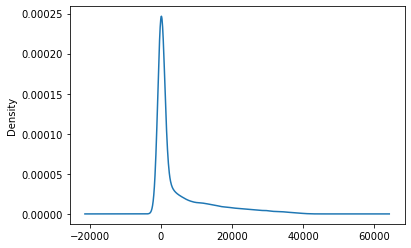

In [14]:
make_analysis(data, 't', qq_plot=False, histogram=False, density=True)

In [17]:
corr = data.corr()

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

,year,month,day,hour,t-3,t-2,t-1,t
year,nan,nan,nan,nan,nan,nan,nan,nan
month,-0.08,nan,nan,nan,nan,nan,nan,nan
day,0.00,-0.03,nan,nan,nan,nan,nan,nan
hour,0.00,-0.01,0.00,nan,nan,nan,nan,nan
t-3,0.08,-0.08,0.00,0.55,nan,nan,nan,nan
t-2,0.08,-0.08,0.00,0.40,0.88,nan,nan,nan
t-1,0.08,-0.08,0.00,0.20,0.69,0.87,nan,nan
t,0.08,-0.08,0.00,-0.03,0.46,0.67,0.86,nan
